1. 

(a).A Classification Decision Tree is a supervised machine learning algorithm that is used to solve classification problems. These problems involve assigning data points to predefined categories or classes based on their attributes. 
    Real-World  Applications: (1). predicting whether a patient has a disease. (2). Classify if a customer will leave a subscription service based on usage patterns and demographics. 

(b). The difference is that A classification decision tree predicts categories, while mutiple linear regression predicts continuous values. 


1. 

ChatBot Summary Session: 

    We discussed Classification Decision Trees, focusing on:
	1.	Type of Problem Addressed: Classification problems where the goal is to assign data points to predefined categories (e.g., medical diagnosis, spam detection). This contrasts with regression problems, which predict continuous values.
	2.	Real-World Applications: Examples include predicting diseases, customer churn, spam detection, loan approvals, and image classification.
	3.	How Predictions Are Made:
	•	Decision Trees: Use a tree-like structure to make sequential splits based on feature values, leading to a final class label.
	•	Multiple Linear Regression: Uses a linear equation to predict continuous outcomes by combining feature values with learned coefficients.
	4.	Key Differences:
	•	Prediction Type: Trees for categories, regression for numbers.
	•	Process: Trees use sequential splits; regression uses a formula.
	•	Interpretability: Trees offer an intuitive path for decisions; regression explains the influence of features through coefficients.
   https://chatgpt.com/share/673f5aca-d2b0-8006-a3cf-88b54a2092e0

2.

(1). The most appropriate scenario to be addressed by Accuracy metric is Diagnosing common illnesses in a general clinic. 
     The rationale is that Accuracy is useful when both positive and negative outcomes are equally important, and the dataset is relatively balanced. For example, if a clinic tests for common colds and other minor ailments where false positives or false negatives carry relatively low stakes, accuracy provides a broad sense of model performance.

(2). The most appropriate scenerio to be addressed by Sensitivity metric is early detection of a rare disease(like lung cancer) in manmmography screenings. 
     The rationale is that Sensitivity ensures that most people with the disease(true postive) will be detected. Missing cases(false negatives) may lead to severe consequences, so it is better and acceptable to have some false postives to maximize the number of correctly detected actual cases. 

(3). The most appropriate scenerio to be addressed by Specification metric is Quality control in manufacturing, such as identifying defective parts in a profuction line. 
     The rationale is that Speficity minimizes false positives, ensuring that non-defective parts are not wrongly flagged as defective, avoiding unnecessary wastage or production delays while maintaining confidence in the quality of the accepted items.

(4). The most appropriate scenerio to be addressed by Precision is Recommender systems, such as suggesting products in an online store. 
     The rationale is that Precision ensures that the recommended products are relavant and desirable. False positives(irrelevant recommendations) can degrade user experience, so it's better to prioritize showing only relavant suggestions over showing a higher quantity of predictions. 

2. 
 
    ChatBot Session Summary:
       Metrics Summary:
	•	Accuracy: Best for balanced datasets and low-stakes scenarios (e.g., common illness diagnosis).
	•	Sensitivity: Prioritizes catching all positives, useful for high-stakes cases like cancer screening or severe weather predictions.
	•	Specificity: Focuses on ruling out negatives, ideal for blood screening.
	•	Precision: Avoids false positives, critical for spam detection or weather alerts.

Weather Prediction: Sensitivity or precision is more appropriate than accuracy due to imbalanced data and the need to prioritize severe weather warnings or reduce false alarms.
     https://chatgpt.com/share/673f6de8-0b28-8006-bcb2-310762a6c2a9

In [16]:
3. 

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the first few rows of the cleaned data
print(ab_reduced_noNaN.head())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

In [17]:
4. 

from sklearn.model_selection import train_test_split

# Perform the 80/20 split, setting a random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations
print(f"Number of observations in the training dataset: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test dataset: {len(ab_reduced_noNaN_test)}")

Number of observations in the training dataset: 255
Number of observations in the test dataset: 64


4.

(1). y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']： 
     Converts the Hard_or_Paper column into binary format using one-hot encoding. Specifically selects the "H" (hard cover) column, where 1 indicates a hard cover book and 1 indicates a paper back book. y becomes the target variable for the classification. 

(2). X = ab_reduced_noNaN[['List Price']]:
     Extracts the List Price column as the predictor (indipendent variable) for the model. X becomes a DataFrame containing only this feature, used to predict y. 

In [18]:
4.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the target and predictor variables
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 1 for Hard, 0 for Paper
X = ab_reduced_noNaN_train[['List Price']]  # Predictor variable: List Price

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

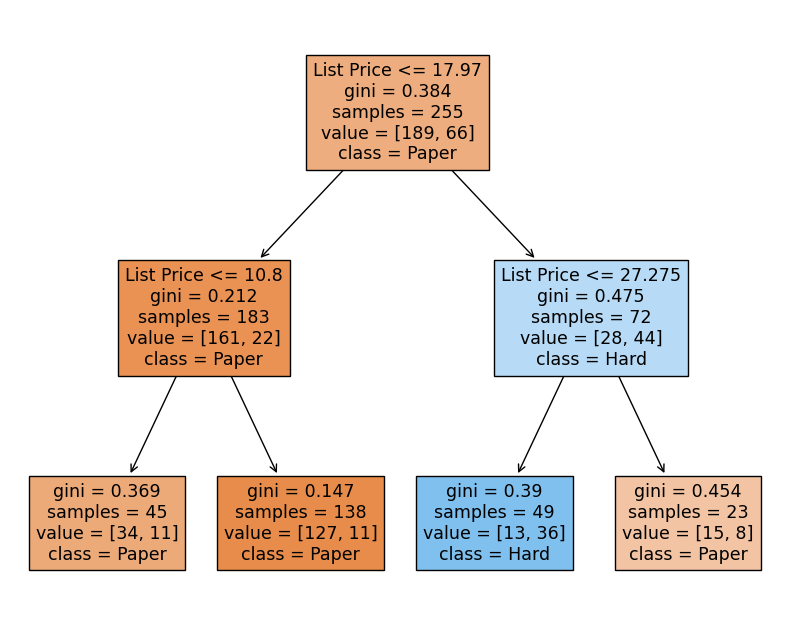

In [19]:
4. 

import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

4. 
   ChatBot Session Summary:
   We discussed how to create an 80/20 data split for training and testing a DecisionTreeClassifier. The target variable y is encoded from Hard_or_Paper (1 = hard cover, 0 = paper back), and the predictor variable X is the List Price column. We reviewed how to fit the model with a max_depth of 2 and visualize it using tree.plot_tree(clf) to interpret predictions based on List Price.
   https://chatgpt.com/share/673f7574-5428-8006-8b82-2a277d979d8f

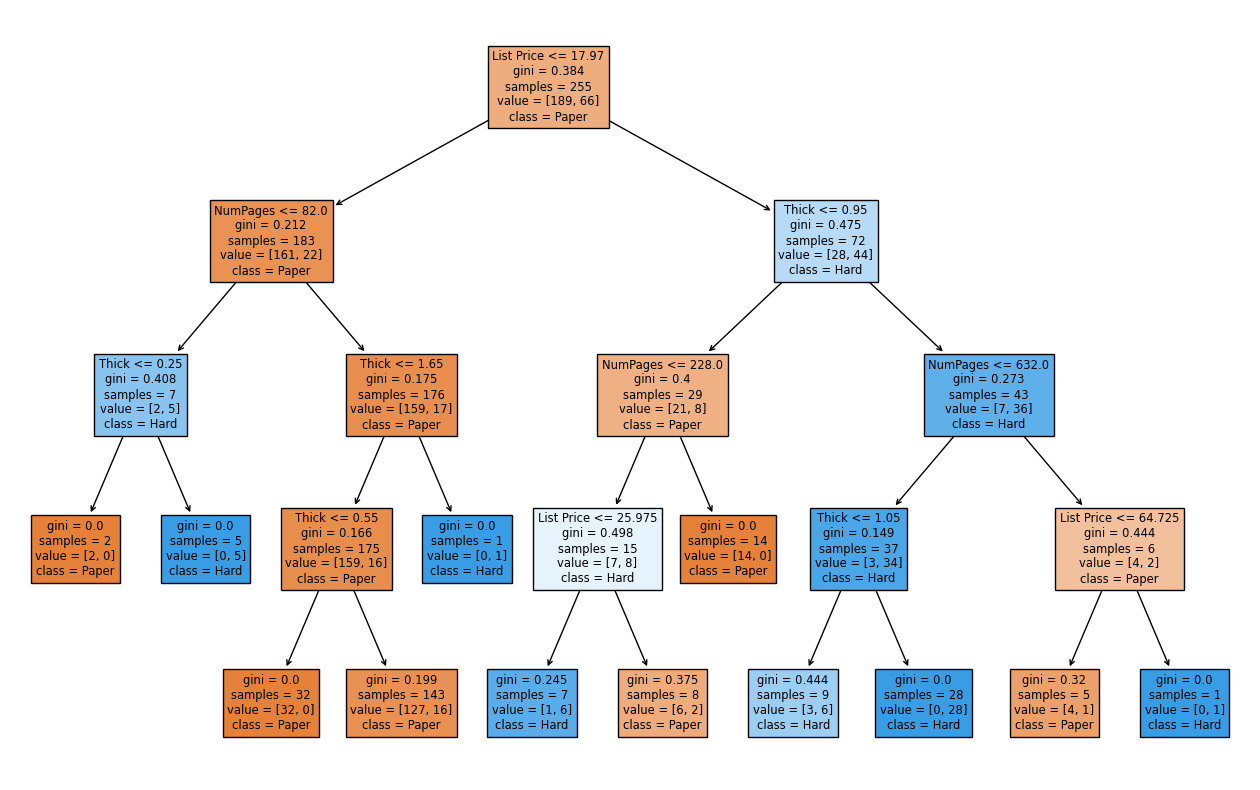

In [20]:
5.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Predictor variables
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Initialize the Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper', 'Hard'], filled=True)
plt.show()

5.

Explanation of Predictions

	General Process:
	The decision tree splits the dataset into subsets based on the predictor variables (NumPages, Thick, List Price) to minimize classification error.
	Each node in the tree represents a decision based on a splitting rule (e.g., NumPages <= 300).
	At each terminal node (leaf), the tree assigns a predicted class (Paper or Hard) based on the majority class of the data in that node.
	Max Depth = 4:
	With a maximum depth of 4, the tree makes up to four levels of splits, allowing for more detailed decision-making while preventing overfitting.

5. 

    ChatBot Summary Session: 
    We discussed training a DecisionTreeClassifier (clf2) using NumPages, Thick, and List Price as predictors to classify books as hard cover or paper back. The model was trained on the same 80/20 train/test split, with max_depth=4. Visualization of the tree using tree.plot_tree was demonstrated, highlighting how predictions are made at each node based on the splitting criteria. Additionally, we explored using GridSearchCV to find the optimal max_depth for better model performance.
    https://chatgpt.com/share/673f7574-5f08-8006-b4ed-41546e5b7f87

In [27]:
6.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# 80/20 Split (already assumed done)

# Test data predictors
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Test data target
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion Matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract values for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()

# Extract values for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

# Metrics for clf
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = (tp_clf + tn_clf) / (tp_clf + tn_clf + fp_clf + fn_clf)

# Metrics for clf2
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = (tp_clf2 + tn_clf2) / (tp_clf2 + tn_clf2 + fp_clf2 + fn_clf2)

# Round metrics to 3 decimal places
metrics_clf = np.round([sensitivity_clf, specificity_clf, accuracy_clf], 3)
metrics_clf2 = np.round([sensitivity_clf2, specificity_clf2, accuracy_clf2], 3)

# Output results
print(f"Metrics for clf: Sensitivity = {metrics_clf[0]}, Specificity = {metrics_clf[1]}, Accuracy = {metrics_clf[2]}")
print(f"Metrics for clf2: Sensitivity = {metrics_clf2[0]}, Specificity = {metrics_clf2[1]}, Accuracy = {metrics_clf2[2]}")

Metrics for clf: Sensitivity = 0.7, Specificity = 0.909, Accuracy = 0.844
Metrics for clf2: Sensitivity = 0.75, Specificity = 0.909, Accuracy = 0.859


6.

ChatBot Session Summary:
    We discussed how to create confusion matrices for two classification models (clf and clf2) using the confusion_matrix function from sklearn. I explained the process to compute sensitivity, specificity, and accuracy for both models by extracting True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) from the confusion matrix. I provided Python code to compute and display these metrics, ensuring the results are formatted to three significant digits and included visualizations of the confusion matrices. Additionally, I clarified key concepts like the roles of y_true and y_pred, and the definitions of TP, TN, FP, and FN.

https://chatgpt.com/share/673f7816-5330-8006-900c-57ea42af76e9

7.

The difference between the two confusion matrices arise as the models use different predictor variables to make their classifications. The first confusion matrix is based on the predictions using only "List Price", while the second matrix uses "Numpage", "Thick", and "List Price". The inclusion of additional predictors in the second model provides the classfier with more information, potentially improving its ability to seperate hard cover and paper back books.

The two confusion matrices for clf and clf2 are better becasue they evaluate model performance in the test set, ensuring that the metrics reflect the ability of the models to generalize to unseen data. By contrast, the confusion matrices shown above are computed on the training data, which risks overestimating performance since the model is evaluated on the same data it was trained on. 

7. 

   ChatBot Session Summary: 
   The user is analyzing differences in confusion matrices for two models. The first model uses only List Price as a predictor, while the second model includes additional features (NumPages and Thick). The inclusion of these features improves the model’s performance by capturing more relevant patterns, leading to better classification results, as reflected in the confusion matrices for clf and clf2.
   https://chatgpt.com/share/673f7b54-bb80-8006-a353-71d916ad0fca

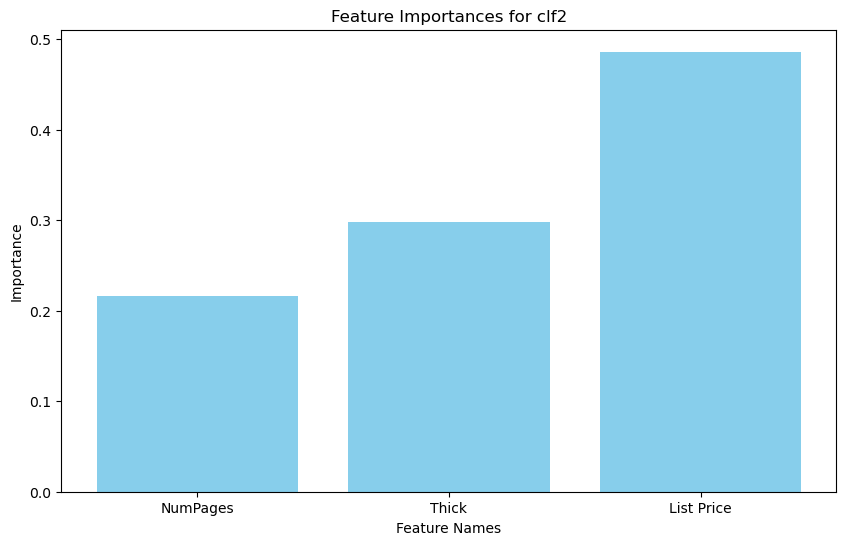

The most important feature for clf2 is: List Price


In [29]:
8.

import matplotlib.pyplot as plt
import numpy as np

# Access feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.title('Feature Importances for clf2')
plt.show()

# Find the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"The most important feature for clf2 is: {most_important_feature}")


8.

ChatBot Session Summary:
    You asked how to visualize and identify the most important features in a scikit-learn decision tree (clf2). The steps include using clf2.feature_importances_ for importance values, clf2.feature_names_in_ for feature names, and creating a bar plot to visualize. The most important feature is found by identifying the maximum value in feature_importances_.
    https://chatgpt.com/share/673f7c45-3458-8006-897d-858590e3e144

9.

In linear regression, coefficients represent the expected change in the target variable for a one-unit increase in a predictor variable, assuming all other predictors are held constant. This provides a direct, interpretable relationship between predictors and the response variable. In contrast, feature importances in decision trees indicate how much each feature contributes to reducing impurity (e.g., Gini index or entropy) across the tree, providing a measure of the relative influence of features on the model’s predictions but not a straightforward numerical relationship.

9.
    ChatBot Session Summary:
        We discussed the differences in interpreting coefficients in linear regression versus feature importances in decision trees. In linear regression, coefficients show the direct relationship between predictor variables and the response variable, reflecting the expected change in the outcome for a one-unit change in a predictor while holding others constant. In decision trees, feature importances measure the relative contribution of each feature to reducing impurity, offering insights into their influence on predictions but without providing a direct numerical relationship.
        https://chatgpt.com/share/673f7c87-4ae4-8006-956b-24c5b8e53dc6

10.   Somewhat